# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true
- Display the first few rows to confirm it loaded correctly.


In [16]:
# Your code to import libraries and load data goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url =  "https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true"
df = pd.read_csv(url)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧

1. The key stakeholders of this dataset are the Marketing team, the Operations/Management, and the Revenue/Finance team.

2. The marketing team wants to customize promotions and loyalty efforts to to certain customers based on length of stay. The operations team wants to forecast peak booking times and the corrensponding resource needs. The finance team wants to analyze ADR, cancellation rates, and deposits types to optimize the revenue coming in to the company.

3. How can hotel management improve guest retention and operational efficiency by looking into key factors that influence booking, length of stay, and special customer request across different customer/hotel types.




## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks
- Flag any issues you notice (e.g., missing values, formatting problems)

In [17]:
# Add code here 🔧
df.info()

df.describe()

missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1. The dataset has 31,994 duplicate rows and missing values in key columns like company, country, and children. Some columns also have formating issues like, reservation_status_date being a string instead of a date.

2. In order to clean the data we are going to need to remove duplicates and convert data types where needed. Additionally, we are going to need to fill or drop columns with too many missing values. We should also remove all booking that have no guests and fix any negative or unrealistic values in the adr column.



## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

📊 ADR Summary Statistics:
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


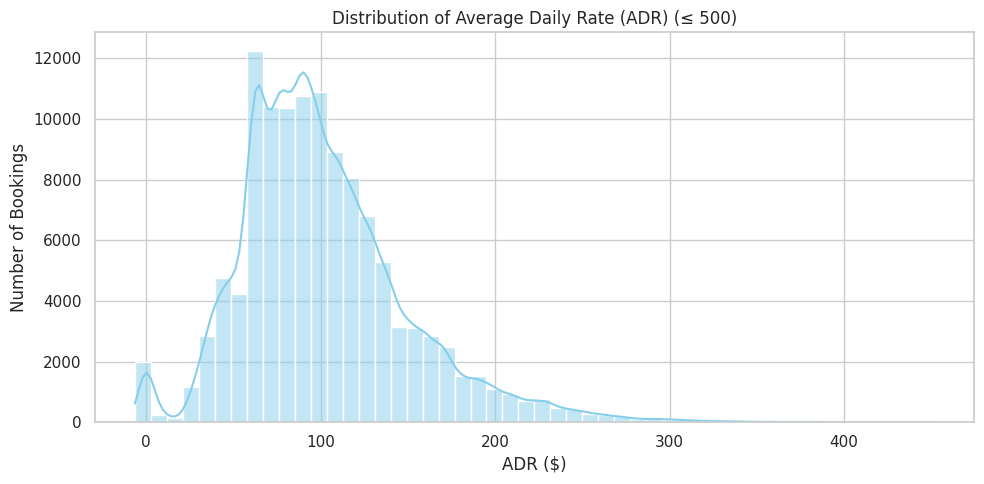


📊 Cancellation Rate Breakdown:
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


/tmp/ipython-input-3314131625.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='Set2')


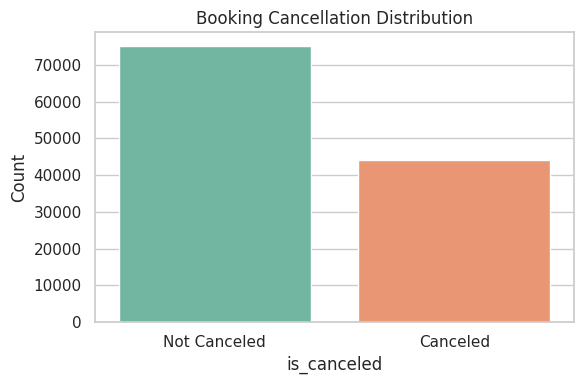


📊 Customer Type Distribution:
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


/tmp/ipython-input-3314131625.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, order=df['customer_type'].value_counts().index, palette='pastel')


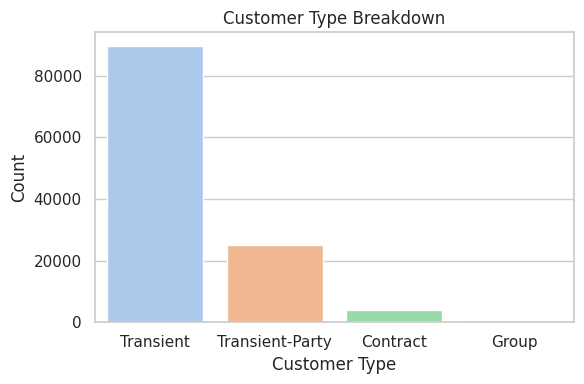

In [18]:
# Your code for univariate analysis (e.g., plots, value counts) 🔧

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true"
df = pd.read_csv(url)

# Set visual style
sns.set(style="whitegrid")

# 1. ADR (Average Daily Rate)
print("📊 ADR Summary Statistics:")
print(df['adr'].describe())

# Filter ADR for visualization (remove extreme outliers)
df_filtered_adr = df[df['adr'] <= 500]

plt.figure(figsize=(10, 5))
sns.histplot(df_filtered_adr['adr'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Average Daily Rate (ADR) (≤ 500)")
plt.xlabel("ADR ($)")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

# 2. is_canceled (Cancellation Rate)
print("\n📊 Cancellation Rate Breakdown:")
print(df['is_canceled'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette='Set2')
plt.title("Booking Cancellation Distribution")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. customer_type (Guest Segments)
print("\n📊 Customer Type Distribution:")
print(df['customer_type'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='customer_type', data=df, order=df['customer_type'].value_counts().index, palette='pastel')
plt.title("Customer Type Breakdown")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
- **Variable 1 – Summary and insights:**  I looked into the distribution of hotel room prices using the adr variable. The data was heavily right-skewed, so I filtered out values above 500 to improve visibility. Most ADRs fell between $50 and $150, with a mean of $101. This shows that the typical booking is reasonably priced, however, there could be a few extremely high outliters that distort the revenue metric if not cleaned.
- **Variable 2 – Summary and insights:**  The second variable that I examined is the cancellation pattern using the is_canceled variable. About 37% of booking were canceled, while 63% were completed. This is a high cancelation rate is important to look into and it may have implication for revenue forecasts and operational strategies.
- **Variable 3 – Summary and insights:**  The third variable that I looked into was the type of customers making bookings. Most were transient guests, followed by transient-pary, with very few contract or group bookings. This shows that the hotel primarily serves short term individual travelers, which can inform the marketing department.


## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

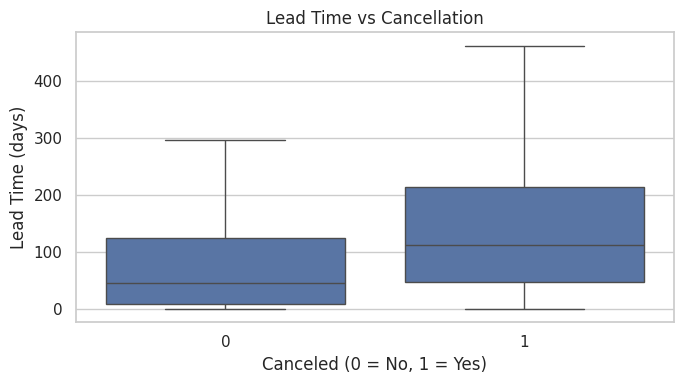

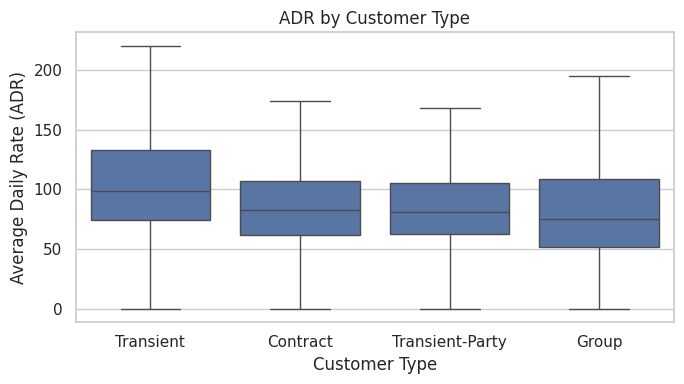

In [19]:
# Your code to analyze variable relationships (e.g., scatterplots, grouped bars)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Pair 1: lead_time vs is_canceled

# Create boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x='is_canceled', y='lead_time', data=df, showfliers=False)
plt.title("Lead Time vs Cancellation")
plt.xlabel("Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()

# Pair 2: adr vs customer_type

# Filter out high ADR outliers
df_filtered = df[df['adr'] <= 500]

# Create boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x='customer_type', y='adr', data=df_filtered, showfliers=False)
plt.title("ADR by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.tight_layout()
plt.show()


### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- **Relationship 1:** The first relationship was lead_time vs is_canceled and I analyzed how far in advance booking were made in relation to cancellations. The boxplot shows that canceled booking show a trend of having a longer lead time, possibly suggesting that guests who book early are more likely to cancel.

- **Relationship 2:**  The next relationship was adr and customer_type and I looked into how the average daily rate (ADR) varies by customer type. Transient guests tend to pay the highest rates, while contract and group customers generally pay less, this shows that there are pricing differences based on segment of guests that are staying at the hotel.


## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. Guests who book far in advance are more likely to cancel their reservations. This pattern suggests that there is a consistent behavioral trend that could impact how hotels plan operational strategies.

2. This problem involves variability, as customer behavior changes depending on how far in advance they book. The lead time introduces uncertainty into forecasting and requires the hotel to adapt to the shifitng booking patterns.

3. Predictive analytics would help the most here, by using historical data to build a model that forecast the likelihood cancellation based on lead time and other factors of data that the hotel company can collect. This would allow the hotel to stay on top of operations and flag reservations that are likely to cancel.



## 7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. We found that booking with longer lead times are more likely to be canceled. Second, different customer types pay different average daily rates, with single guests typically paying the highest average.

2. The cancelation trend helps the operations and revenue team better manage operational risks like over/underbooking and forecast the occupancy of the hotel more effectively. The pricing differences by customer type support the marketing and finance teams in tailoring offers to certain customer segments.

3. I would recommend that the hotel uses a predictive cancellation model using lead time and customer type as key indicators. Then use the model to potentially apply a deposit policy to customers who are flagged as high risk of cancellation.

4. This analysis shows how I can use data to fram real business problems and apply basic analytical methods. Then translate those insights into clear and actionable recommendations. This works right alongside of my goal to use data to solve business challenges for stakeholders.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [21]:
!jupyter nbconvert --to html "assignment_05_WoodMason.ipynb"

[NbConvertApp] Converting notebook assignment_05_WoodMason.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 510206 bytes to assignment_05_WoodMason.html
